# Librerias

In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils import np_utils
import tensorflow

import seaborn as sns
import matplotlib.pyplot as plt
import os

import pygad.kerasga

#Para Paralelizar
from tqdm import tqdm
from multiprocessing.dummy import Pool

import warnings
#PARA ANOVA 1-1
from bioinfokit.analys import stat

warnings.filterwarnings('ignore')

2022-04-27 19:41:57.856127: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
pool = Pool(16)

# Variables GLobales

In [3]:
os.chdir(r"/home/jest/Documents/personal/sistemas inteligentes/proyecto/segunda entrega")
path_name_model = 'dataset/datos_para_modelo.csv'

### 1. Carga Dataset

In [4]:
df = pd.read_csv(path_name_model, sep='|')

### 2. Filtro de dataset

In [5]:
df = df.iloc[:,1:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   estu_genero                   4526 non-null   object 
 1   estu_tieneetnia               4526 non-null   object 
 2   estu_depto_reside             4526 non-null   object 
 3   estu_mcpio_reside             4526 non-null   object 
 4   fami_estratovivienda          4526 non-null   object 
 5   fami_personashogar            4526 non-null   object 
 6   fami_cuartoshogar             4526 non-null   object 
 7   fami_tieneinternet            4526 non-null   object 
 8   fami_tieneserviciotv          4526 non-null   object 
 9   fami_tienecomputador          4526 non-null   object 
 10  fami_tienelavadora            4526 non-null   object 
 11  fami_tienehornomicroogas      4526 non-null   object 
 12  fami_tieneautomovil           4526 non-null   object 
 13  fam

In [7]:
dataset = df.values

### 3. Separación muestra entrenamiento y testing

In [8]:
X = dataset[:, :-1]
y = dataset[:,-1]
X = X.astype(str)
y = y.reshape((len(y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3168, 22) (3168, 1)
Test (1358, 22) (1358, 1)


In [9]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
oe.fit(X_test)
X_test_enc = oe.transform(X_test)

In [10]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc = np_utils.to_categorical(y_train_enc)
y_test_enc = np_utils.to_categorical(y_test_enc)

data_inputs = X_train_enc
data_outputs = y_train_enc

### 4. Modelo Redes Neuronales

Del primer entregable tenemos que el mejor modelo es
- Mejor modelo: función de activación sigmoide
- 15 épocas
- optimizador de Adam

In [11]:
# modelo de 3 capas (1 oculta)
model = Sequential()
model.add(Dense(64, input_dim=X_train_enc.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(16, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(3, activation='sigmoid'))

2022-04-27 19:41:59.696033: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-27 19:41:59.696231: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-27 19:41:59.696239: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-27 19:41:59.696250: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jest): /proc/driver/nvidia/version does not exist
2022-04-27 19:41:59.696398: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow w

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________


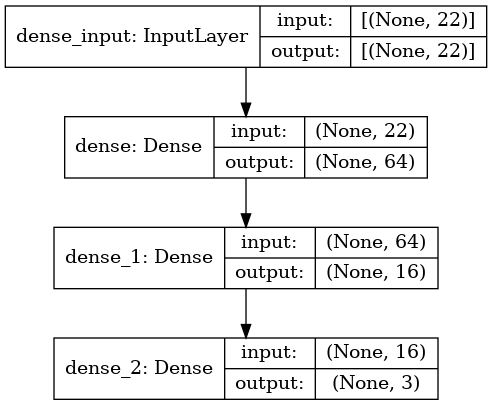

In [13]:
plot_model(model, 
         show_shapes=True, show_layer_names=True)

In [14]:
print('Resultados bajo consideración Primer Ejercicio')
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=30, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy Test: %.2f' % (accuracy*100))

2022-04-27 19:41:59.864415: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-27 19:41:59.882249: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Resultados bajo consideración Primer Ejercicio
Epoch 1/30
198/198 - 0s - loss: 0.5697 - accuracy: 0.5290
Epoch 2/30
198/198 - 0s - loss: 0.4094 - accuracy: 0.7251
Epoch 3/30
198/198 - 0s - loss: 0.3116 - accuracy: 0.8261
Epoch 4/30
198/198 - 0s - loss: 0.2636 - accuracy: 0.8876
Epoch 5/30
198/198 - 0s - loss: 0.2304 - accuracy: 0.9097
Epoch 6/30
198/198 - 0s - loss: 0.2017 - accuracy: 0.9233
Epoch 7/30
198/198 - 0s - loss: 0.1764 - accuracy: 0.9296
Epoch 8/30
198/198 - 0s - loss: 0.1558 - accuracy: 0.9375
Epoch 9/30
198/198 - 0s - loss: 0.1396 - accuracy: 0.9438
Epoch 10/30
198/198 - 0s - loss: 0.1239 - accuracy: 0.9517
Epoch 11/30
198/198 - 0s - loss: 0.1128 - accuracy: 0.9473
Epoch 12/30
198/198 - 0s - loss: 0.1015 - accuracy: 0.9549
Epoch 13/30
198/198 - 0s - loss: 0.0949 - accuracy: 0.9571
Epoch 14/30
198/198 - 0s - loss: 0.0856 - accuracy: 0.9634
Epoch 15/30
198/198 - 0s - loss: 0.0793 - accuracy: 0.9640
Epoch 16/30
198/198 - 0s - loss: 0.0723 - accuracy: 0.9719
Epoch 17/30
198/19

### 5. Implementando factor Genetico

In [15]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [16]:
def grid_ag_manual_model(model, 
                   num_solutions_,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 50,
                   num_parents_mating = 5,
                   parent_selection_type_= 'sss',
                   keep_parents_ = -1,
                   mutation_type_ = 'random'):
    weights_vector = pygad.kerasga.model_weights_as_vector(model=model)
    keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=num_solutions_)
    initial_population = keras_ga.population_weights
    ga_instance = pygad.GA(num_generations=num_generations, 
                           num_parents_mating=num_solutions_, 
                           initial_population=initial_population,
                           parent_selection_type= parent_selection_type_,
                           keep_parents = keep_parents_,
                           mutation_type = mutation_type_,
                           fitness_func=fitness_func,
                           mutation_percent_genes= 'default' if mutation_type_ != 'adaptive' else [0.5, 0.5],
                          # on_generation=callback_generation
                          )
    
    ga_instance.run()
    
    
    return ga_instance

In [17]:
def grid_ag_manual(model, 
                   num_solutions_,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 50,
                   num_parents_mating = 5,
                   parent_selection_type_= 'sss',
                   keep_parents_ = -1,
                   mutation_type_ = 'random'):
    weights_vector = pygad.kerasga.model_weights_as_vector(model=model)
    keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=num_solutions_)
    initial_population = keras_ga.population_weights
    ga_instance = pygad.GA(num_generations=num_generations, 
                           num_parents_mating=num_solutions_, 
                           initial_population=initial_population,
                           parent_selection_type= parent_selection_type_,
                           keep_parents = keep_parents_,
                           mutation_type = mutation_type_,
                           fitness_func=fitness_func,
                           mutation_percent_genes= 'default' if mutation_type_ != 'adaptive' else [0.5, 0.5],
                          # on_generation=callback_generation
                          )
    
    ga_instance.run()
    
    # Returning the details of the best solution.
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    #print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    #print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
    
    # Fetch the parameters of the best solution.
    best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
    
    model.set_weights(best_solution_weights)
    predictions = model.predict(data_inputs)
    #print("Predictions : \n", predictions)
    
    # Calculate the categorical crossentropy for the trained model.
    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    #print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

    # Calculate the classification accuracy for the trained model.
    ca = tensorflow.keras.metrics.CategoricalAccuracy()
    ca.update_state(data_outputs, predictions)
    #print(ca.result())
    accuracy = ca.result().numpy()
    #print("Accuracy : ", accuracy)


    return_value = (num_solutions_,
                    num_generations,
                     num_parents_mating,
                     parent_selection_type_,
                     keep_parents_,
                     mutation_type_,
                     solution_fitness, solution_idx, cce(data_outputs, predictions).numpy(), accuracy )
    return return_value

# num_generations
# num_parents_mating
# parent_selection_type
# keep_parents_
# mutation_type
# solution_fitness
# solution_idx
# entriopia
# accuracy



In [18]:
aux = grid_ag_manual(model, 
                   num_solutions_=2,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 200,
                   num_parents_mating = 5,
                   parent_selection_type_= 'tournament',
                   keep_parents_ = -1,
                   mutation_type_ = 'adaptive')
pd.DataFrame(aux).transpose()

,0,1,2,3,4,5,6,7,8,9
0,2,200,5,tournament,-1,adaptive,29.828191,0,0.072291,0.972854


In [19]:
X_train_enc

array([[ 1.,  0.,  0., ..., 19., 25., 23.],
       [ 1.,  0.,  0., ..., 26., 45.,  8.],
       [ 1.,  0.,  0., ..., 44., 41., 52.],
       ...,
       [ 0.,  0.,  0., ..., 21., 23., 18.],
       [ 0.,  0.,  0., ..., 20., 27.,  7.],
       [ 1.,  0.,  0., ..., 17., 23., 17.]])

# Diseño de experimentos

In [20]:
num_solutions = [1,2,5,10]
num_generations = [10,20, 50, 100]
num_parents_mating = [5,8]
parent_selection_type = ['sss', 'rws', 'rank', 'tournament']
keep_parents = [-1,0]
mutation_type_= ['swap', 'inversion', 'scramble', 'adaptive']

In [21]:
print('Numero de experimentos')
len(num_solutions) * len(num_generations) * len(num_parents_mating) * len(parent_selection_type) * len(keep_parents) * len(mutation_type_)

Numero de experimentos


1024

### 6. Corrida de Experimentos

In [22]:
futures = list()

In [23]:
for i in num_solutions:
    for j in num_generations:
        for k in num_parents_mating: 
            for l in parent_selection_type:
                for m in keep_parents:
                    for n in mutation_type_: 
                        futures.append(pool.apply_async(func=grid_ag_manual,
                                                        args= (model, i,X_train_enc,y_train_enc,j,k,l,m,n)))

In [24]:
%%time
df_results =pd.DataFrame()
for future in tqdm(futures):
        try: df_results = df_results.append(pd.DataFrame(future.get()).transpose())
        except: pass

100%|████████████████████████████████████████| 1024/1024 [1:40:48<00:00,  5.91s/it]

CPU times: user 3h 10s, sys: 16min 47s, total: 3h 16min 57s
Wall time: 1h 40min 48s


In [25]:
df_results.columns = ['num_solutions','num_generations', 'num_parents_mating','parent_selection_type',
'keep_parents_',
'mutation_type',
'solution_fitness',
'solution_idx',
'entriopia',
'accuracy']

In [26]:
df_results.head()

,num_solutions,num_generations,num_parents_mating,parent_selection_type,keep_parents_,mutation_type,solution_fitness,solution_idx,entriopia,accuracy
0,1,10,5,sss,-1,swap,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,inversion,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,scramble,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,adaptive,29.828191,0,0.072291,0.972854
0,1,10,5,sss,0,swap,4.06236,0,1.62826,0.626578


In [27]:
df_results.accuracy = pd.to_numeric(df_results.accuracy)

### 7. Analisis de Variables

Text(0.5, 1.0, 'Tipo de selección vs Accuracy')

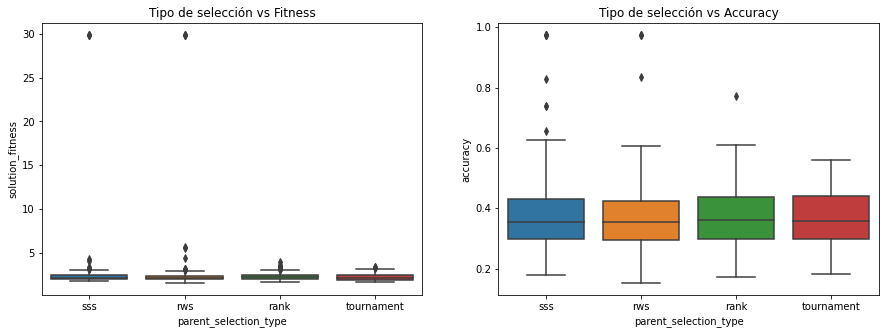

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='parent_selection_type', y='solution_fitness', ax=ax[0]).set_title('Tipo de selección vs Fitness')
sns.boxplot(data=df_results, x='parent_selection_type', y='accuracy', ax=ax[1]).set_title('Tipo de selección vs Accuracy')

In [29]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='parent_selection_type', anova_model='accuracy ~ C(parent_selection_type)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,sss,rws,0.009547,-0.015075,0.034170,1.411095,0.725217
1,sss,rank,0.006959,-0.017663,0.031582,1.028570,0.876970
2,sss,tournament,0.010276,-0.014346,0.034899,1.518799,0.682489
3,rws,rank,0.002588,-0.022034,0.027211,0.382525,0.900000
4,rws,tournament,0.000729,-0.023894,0.025351,0.107705,0.900000
5,rank,tournament,0.003317,-0.021306,0.027939,0.490229,0.900000


Text(0.5, 1.0, 'Tipo de mutacion vs Accuracy')

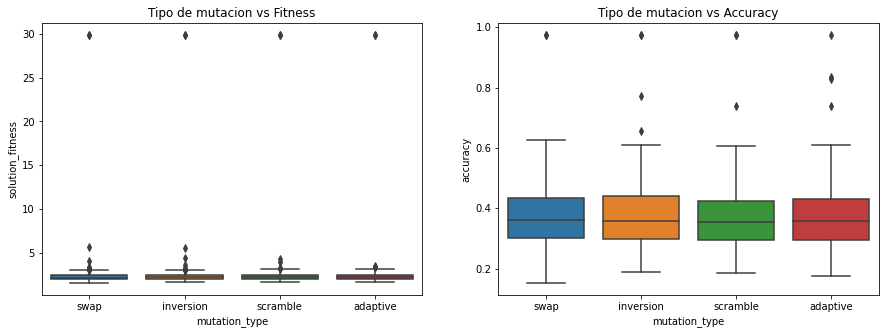

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='mutation_type', y='solution_fitness', ax=ax[0]).set_title('Tipo de mutacion vs Fitness')
sns.boxplot(data=df_results, x='mutation_type', y='accuracy', ax=ax[1]).set_title('Tipo de mutacion vs Accuracy')

In [31]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='mutation_type', anova_model='accuracy ~ C(mutation_type)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,swap,inversion,0.005080,-0.019553,0.029713,0.750523,0.900000
1,swap,scramble,0.001974,-0.022659,0.026607,0.291647,0.900000
2,swap,adaptive,0.001904,-0.022729,0.026537,0.281264,0.900000
3,inversion,scramble,0.007054,-0.017579,0.031687,1.042170,0.871575
4,inversion,adaptive,0.003176,-0.021456,0.027809,0.469259,0.900000
5,scramble,adaptive,0.003878,-0.020755,0.028511,0.572911,0.900000


Text(0.5, 1.0, 'Número Generaciones vs Accuracy')

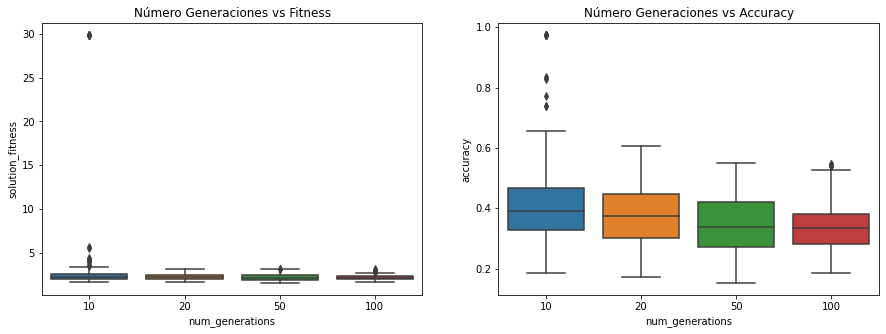

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='num_generations', y='solution_fitness', ax=ax[0]).set_title('Número Generaciones vs Fitness')
sns.boxplot(data=df_results, x='num_generations', y='accuracy', ax=ax[1]).set_title('Número Generaciones vs Accuracy')

In [33]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='num_generations', anova_model='accuracy ~ C(num_generations)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,10,20,0.041855,0.018136,0.065575,6.421676,0.001000
1,10,50,0.065717,0.041997,0.089437,10.082666,0.001000
2,10,100,0.076097,0.052377,0.099816,11.675173,0.001000
3,20,50,0.023862,0.000142,0.047581,3.660989,0.048008
4,20,100,0.034241,0.010522,0.057961,5.253497,0.001225
5,50,100,0.010380,-0.013340,0.034099,1.592508,0.653250


In [45]:
df_results.sort_values('accuracy', ascending=False).head(10)

,num_solutions,num_generations,num_parents_mating,parent_selection_type,keep_parents_,mutation_type,solution_fitness,solution_idx,entriopia,accuracy
0,1,10,5,sss,-1,swap,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,scramble,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,adaptive,29.828191,0,0.072291,0.972854
0,1,10,5,sss,-1,inversion,29.828191,0,0.072291,0.972854
0,1,10,5,rws,-1,swap,29.828191,0,0.072291,0.972854
0,1,10,5,rws,-1,inversion,29.828191,0,0.072291,0.972854
0,1,10,5,rws,-1,scramble,29.828191,0,0.072291,0.972854
0,1,10,5,rws,-1,adaptive,29.828191,0,0.376263,0.833649
0,1,10,5,sss,0,adaptive,3.334566,0,0.637234,0.830177
0,1,10,5,rank,0,inversion,2.979525,0,0.742082,0.773359


### 8. Mejor modelo basado en Accuracy

In [42]:
best_parameters = df_results.sort_values('accuracy', ascending=False).head(1)

In [43]:
best_parameters = best_parameters.loc[0]

In [44]:
best_parameters

num_solutions                    1
num_generations                 10
num_parents_mating               5
parent_selection_type          sss
keep_parents_                   -1
mutation_type                 swap
solution_fitness         29.828191
solution_idx                     0
entriopia                 0.072291
accuracy                  0.972854
Name: 0, dtype: object

In [37]:
best_model = grid_ag_manual_model(model, 
                   num_solutions_=best_parameters.num_solutions,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = best_parameters.num_generations,
                   num_parents_mating = best_parameters.num_parents_mating,
                   parent_selection_type_= best_parameters.parent_selection_type,
                   keep_parents_ = best_parameters.keep_parents_,
                   mutation_type_ = best_parameters.mutation_type)


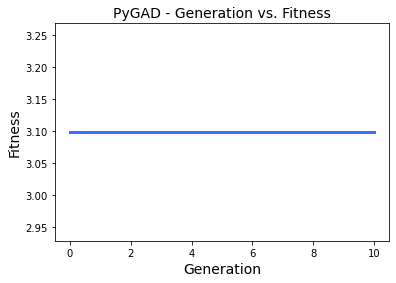

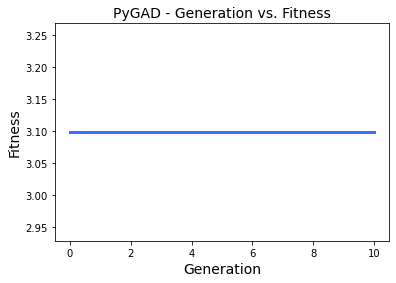

In [39]:
best_model.plot_result()

In [41]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = best_model.best_solution()

print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                          weights_vector=solution)

model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
print(ca.result())
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)


Fitness value of the best solution = 3.098357501981001
Index of the best solution : 0
Predictions : 
 [[9.2909024e-05 1.1828214e-02 2.4886455e-09]
 [9.2491042e-05 1.1964589e-02 2.4735824e-09]
 [1.0711870e-04 8.6087883e-03 3.0750136e-09]
 ...
 [2.1153688e-04 2.3258328e-03 8.3493523e-09]
 [1.3700128e-04 5.1066279e-03 4.4470800e-09]
 [1.7703474e-03 4.9885809e-03 7.3577347e-08]]
Categorical Crossentropy :  5.051428
tf.Tensor(0.5116793, shape=(), dtype=float32)
Accuracy :  0.5116793


In [46]:
# validando test
predictions = model.predict(X_test_enc)
print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(y_test_enc, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(y_test_enc, predictions)
print(ca.result())
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

Predictions : 
 [[9.5487107e-05 1.1163592e-02 2.5935583e-09]
 [1.8779516e-05 6.2212980e-01 3.0678532e-10]
 [9.5481824e-05 1.1164844e-02 2.5933455e-09]
 ...
 [2.8717222e-05 9.7547865e-01 3.4808448e-10]
 [8.9996254e-05 1.2821227e-02 2.3829307e-09]
 [9.1847796e-05 1.2138575e-02 2.4470970e-09]]
Categorical Crossentropy :  4.938615
tf.Tensor(0.50810015, shape=(), dtype=float32)
Accuracy :  0.50810015
